# Project Title - Data Analysis on High Value Customer Identification 

This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store, downloaded from Kaggle, This project is to analyse and find significant customers for the business who make high purchases of their favourite products. Data preparation and cleaning is done using various libraries such as pandas, datetime and Exploratory analysis and visualization using matplotlib and seaborn.

## Load the dataset into a data frame using Pandas

Download the dataset Ecommerce manually and upload it via Jupyter's GUI

In [1]:
project_name = "Data Analysis on High Value Customer Identification"

In [2]:
import pandas as pd
import datetime
import random

In [3]:
df = pd.read_csv('Ecommerce.csv',encoding='cp1252')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## Data Preparation and Cleaning


### 1. Exploring the number of rows & columns, ranges of values etc.

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [6]:
df.shape
print(f'The Number of Rows in the Ecommerce dataset are: {df.shape[0]}')
print(f'The Number of Columns in the Ecommerce dataset are: {df.shape[1]}')

The Number of Rows in the Ecommerce dataset are: 541909
The Number of Columns in the Ecommerce dataset are: 8


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 2. Handling missing, incorrect and invalid data

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
# The min value in Unit price column is 0 so that is invalid
df.drop(df[df.UnitPrice == 0.0].index, inplace=True)

In [12]:
# The min value in quantity column is negative so that is invalid
df.drop(df[df.Quantity < 0].index, inplace=True)

In [13]:
df['CustomerID'].isnull().sum()

132222

In [14]:
# Dropping rows with null values
df.dropna(axis = 0,inplace = True)

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
df.shape

(397884, 8)

In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3. parsing dates and creating additional columns.

In [18]:
# Converting invoice date object column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [19]:
# Converting Invoicedate obbject type column into datetime type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [20]:
# Creating a new column Year
df['Year'] = df['InvoiceDate'].dt.strftime('%Y')

In [21]:
# Creating a new column Month
df['Month'] = df['InvoiceDate'].dt.strftime('%m')

In [22]:
# Creating a new column date
df['Day'] = df['InvoiceDate'].dt.strftime('%d')

In [23]:
# Calculating income from quatity and unit price
df['Total_Income'] = df['Quantity'] * df['UnitPrice']

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Total_Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34


In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anithabhukya/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/anithabhukya/zerotopandas-course-project-starter


'https://jovian.ai/anithabhukya/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Computing the mean, sum, range and other interesting statistics for numeric columns

In [29]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total_Income
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Total_Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34


### 1. Plotting a bar plot for the Total Income in 12 months

In [31]:
Month_grp = df.groupby(df['Month'])['Total_Income'].sum().index
Income = df.groupby(df['Month'])['Total_Income'].sum().values


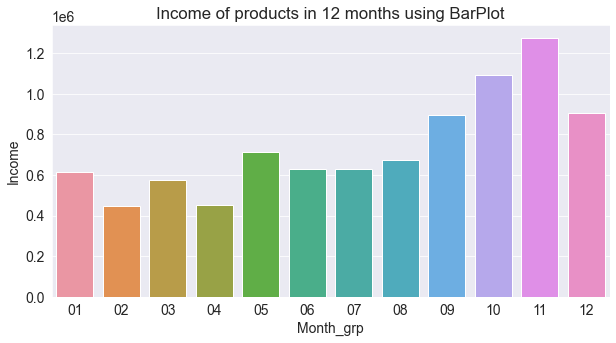

In [32]:
plt.title('Income of products in 12 months using BarPlot')
sns.barplot(x = Month_grp, y = Income)
plt.xlabel ('Month_grp')
plt.ylabel ('Income');

###### From the above bar plot the total income is highest in the month of november followed by october, september and december.

### 2. Exploring distributions of numeric columns using histograms

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Total_Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34


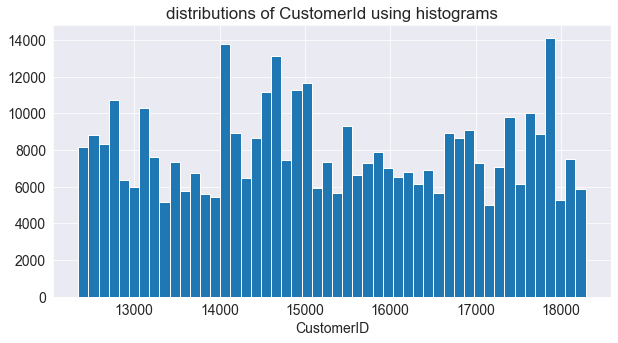

In [34]:
plt.title('distributions of CustomerId using histograms')
plt.hist(df.CustomerID,bins = 50)
plt.xlabel('CustomerID');


##### Distribution of customerID using seaborn

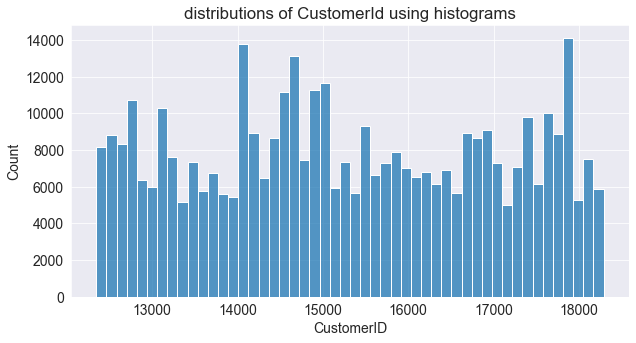

In [35]:
plt.title('distributions of CustomerId using histograms')
sns.histplot(x=df.CustomerID,bins = 50)
plt.xlabel('CustomerID')
plt.ylabel('Count');

##### From the above histogram, the frequency of customer around 18000 customerID's are highest amongst all the customers

### 3. Explore relationship between customerId's and total income using scatter plots

In [36]:
CustomerID_grp = list(df.groupby(df['CustomerID'])['Total_Income'].sum().index)
CustomerID_Income= list(df.groupby(df['CustomerID'])['Total_Income'].sum().values)

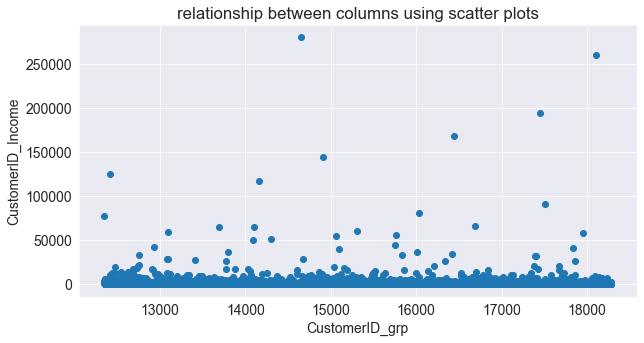

In [37]:
plt.title('relationship between columns using scatter plots')
plt.scatter(CustomerID_grp,CustomerID_Income)
plt.xlabel('CustomerID_grp')
plt.ylabel('CustomerID_Income');


### 4. Boxplot of UnitPrice column to find out outliers

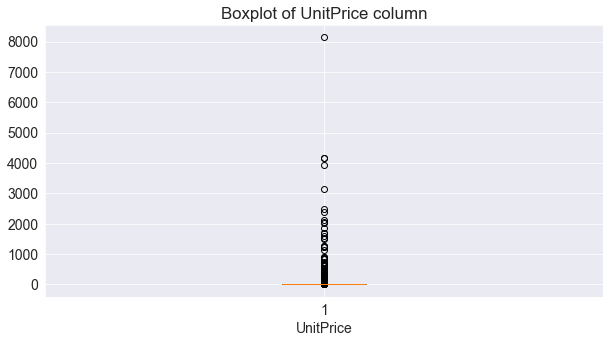

In [38]:
plt.title('Boxplot of UnitPrice column')
plt.boxplot(df.UnitPrice)
plt.xlabel('UnitPrice');

In [39]:
df[df['UnitPrice'] > 3000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Total_Income
173382,551697,POST,POSTAGE,1,2017-05-01,8142.75,16029.0,United Kingdom,2017,05,01,8142.75
374542,569382,M,Manual,1,2017-10-01,3155.95,15502.0,United Kingdom,2017,10,01,3155.95
406406,571751,M,Manual,1,2017-10-17,3949.32,12744.0,Singapore,2017,10,17,3949.32
422351,573077,M,Manual,1,2017-10-25,4161.06,12536.0,France,2017,10,25,4161.06
422376,573080,M,Manual,1,2017-10-25,4161.06,12536.0,France,2017,10,25,4161.06


#### Q6: Heatmap of the dataset

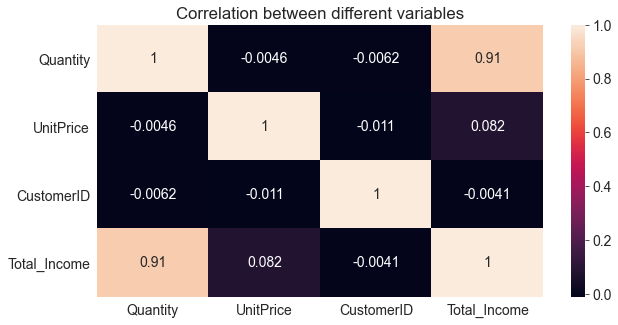

In [40]:
plt.title('Correlation between different variables')
sns.heatmap(df.corr(), annot = True);

##### From the above box plot there are 5 products that are above 3000 , one of which is 8142.75

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anithabhukya/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/anithabhukya/zerotopandas-course-project-starter


'https://jovian.ai/anithabhukya/zerotopandas-course-project-starter'

## Asking and Answering Questions

Here we will find out about the top and bottom 10 customers, top and bottom 10 products



In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Total_Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34


#### Q1: Top 10 customers who generated revenue for the retail store

In [44]:
top10_customers = df.groupby('CustomerID')['Total_Income'].sum()
top10_customers = top10_customers.sort_values(ascending=False).head(10)
top10_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Total_Income, dtype: float64

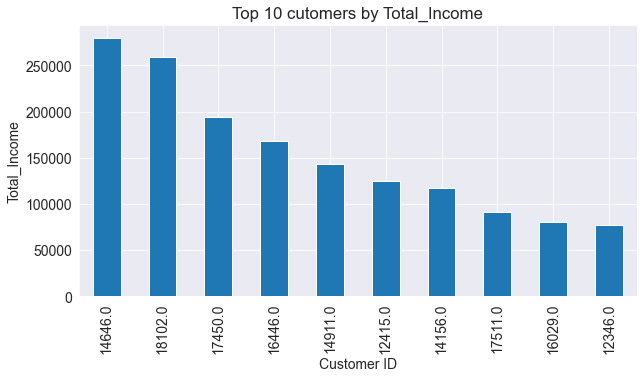

In [45]:
plt.title('Top 10 cutomers by Total_Income')
top10_customers.plot(kind='bar')

plt.xlabel('Customer ID')
plt.ylabel('Total_Income');

##### From the above bar plot the customer with ID - 14646 is the top customer to generate the highest income for the retail store

#### Q1: Bottom 10 customers who generated least revenue for the retail store

In [46]:
bottom10_customers = df.groupby('CustomerID')['Total_Income'].sum()
bottom10_customers = bottom10_customers.sort_values().head(10)
bottom10_customers

CustomerID
16738.0     3.75
14792.0     6.20
16454.0     6.90
17956.0    12.75
16878.0    13.30
15823.0    15.00
13307.0    15.00
17763.0    15.00
16093.0    17.00
16953.0    20.80
Name: Total_Income, dtype: float64

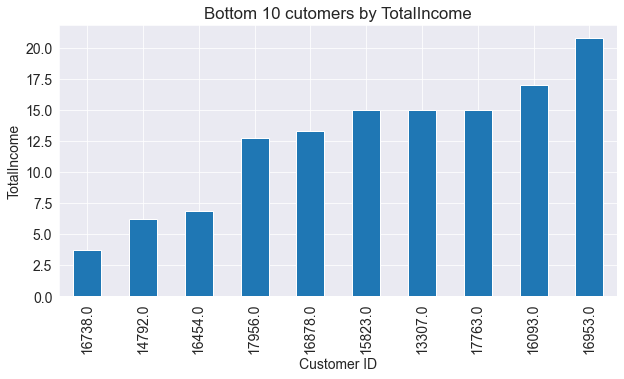

In [47]:
plt.title('Bottom 10 cutomers by TotalIncome')
bottom10_customers.plot(kind='bar')
plt.xlabel('Customer ID')
plt.ylabel('TotalIncome');

##### From the above bar plot the customer with ID - 16738 is the bottom customer to generate the least income for the retail store

#### Q3: Top 10 products sold 

In [48]:
top10_products = df.groupby(df['Description'])['Quantity'].sum()
top10_products = top10_products.sort_values(ascending = False).head(10)
top10_products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

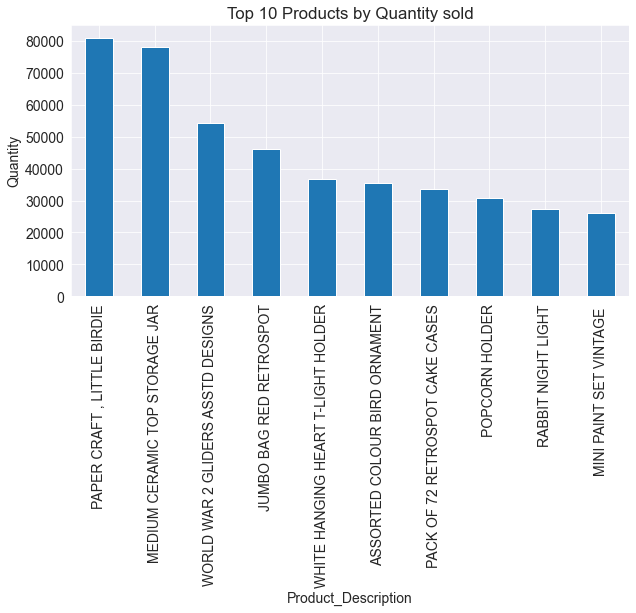

In [49]:
plt.title('Top 10 Products by Quantity sold')
top10_products.plot(kind='bar')
plt.xlabel('Product_Description')
plt.ylabel('Quantity');

##### The above products was sold more than 80995, so the retail store can make sure that it doesn't run out of the top 10 products

#### Q4: Bottom 10 products

In [50]:
bottom_10_products = df.groupby(df['Description'])['Quantity'].sum()
bottom_10_products = bottom_10_products.sort_values().head(10)
bottom_10_products

Description
SET OF 3 PINK FLYING DUCKS             1
DOLPHIN WINDMILL                       1
CRACKED GLAZE EARRINGS BROWN           1
LASER CUT MULTI STRAND NECKLACE        1
SET/3 TALL GLASS CANDLE HOLDER PINK    1
CHERRY BLOSSOM PURSE                   1
HEN HOUSE W CHICK IN NEST              1
CAKE STAND LACE WHITE                  1
MARIE ANTOIENETT TRINKET BOX GOLD      1
MUMMY MOUSE RED GINGHAM RIBBON         1
Name: Quantity, dtype: int64

##### The above products are the least sold products

#### Q5: Invoice number which generated the highest income

In [51]:
invoice_1 = df.groupby(df['InvoiceNo'])['Total_Income'].sum()
invoice_1 = invoice_1.sort_values(ascending = False).head(10)
invoice_1

InvoiceNo
581483    168469.60
541431     77183.60
556444     38970.00
567423     31698.16
556917     22775.93
572209     22206.00
567381     22104.80
563614     21880.44
550461     21535.90
572035     20277.92
Name: Total_Income, dtype: float64

Let us save and upload our work to Jovian before continuing.

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anithabhukya/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/anithabhukya/zerotopandas-course-project-starter


'https://jovian.ai/anithabhukya/zerotopandas-course-project-starter'

## Inferences and Conclusion

In the above project we did data preprocessing, data cleaning , handling of missing data , invalid data, incorrect data, converted object column to datetime and created 3 new columns like date , month, year later using various data visualization libraries such as matplotlib and seaborn created plots like barplot - Total income monthly to find which month generated more revenue, histogram - To find the customerID's with highest count, scatterplot - To evaluate relationship between customerID and totalIncome and box plot to find outliers.

Later we found the top and bottom 10 customers and top and bottom 10 products using groupby and sort functions.

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anithabhukya/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/anithabhukya/zerotopandas-course-project-starter


'https://jovian.ai/anithabhukya/zerotopandas-course-project-starter'